# Analyzing Contract Opportunities Data

Dataset contains information about the contract opportunities announced in the year 2020. Date of anouncement, deadline, department and more important information.
Dataset is extracted from the below URL.
https://sam.gov/data-services/Contract%20Opportunities/Archived%20Data?privacy=Public

In [1]:
%%time
#installing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import requests
import re
import plotly.express as px
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import pearsonr

CPU times: total: 797 ms
Wall time: 3.84 s


In [2]:
%%time
#reading csv file from the path and printing time taken to read the file
url="https://umbc.box.com/shared/static/91lmieun5u1e8p87wmlnuglyzl3xm91h.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('iso-8859-1')))
data.head()

<timed exec>:4: DtypeWarning: Columns (17,27) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 45.1 s
Wall time: 2min 58s


,NoticeId,Title,Sol#,Department/Ind.Agency,CGAC,Sub-Tier,FPDS Code,Office,AAC Code,PostedDate,...,SecondaryContactPhone,SecondaryContactFax,OrganizationType,State,City,ZipCode,CountryCode,AdditionalInfoLink,Link,Description
0,425a9edc53e84373aeb2826644ac97b6,66--Airfield Friction Tester,W50S9C-20-Q-0003,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,W7N4 USPFO ACTIVITY VT ARNG,W912LN,2020-09-30 23:57:23.594-04,...,NaN,NaN,OFFICE,VT,COLCHESTER,05446-3099,USA,NaN,https://sam.gov/opp/425a9edc53e84373aeb2826644...,NaN
1,cbdb7b8ee8de4179b25c36e3b4819a2c,65--COVID 19 cleaning supplies,1018031080_01,"STATE, DEPARTMENT OF",19.0,"STATE, DEPARTMENT OF",1900,ACQUISITIONS - AQM MOMENTUM,19AQMM,2020-09-30 23:53:02.228-04,...,NaN,NaN,OFFICE,DC,WASHINGTON,20520,USA,NaN,https://sam.gov/opp/cbdb7b8ee8de4179b25c36e3b4...,NaN
2,c8609373b0734f1aa5d9dcdf7e26f4c6,58--Voyager DSV,1019022491_01,"STATE, DEPARTMENT OF",19.0,"STATE, DEPARTMENT OF",1900,ACQUISITIONS - AQM MOMENTUM,19AQMM,2020-09-30 23:48:57.306-04,...,NaN,NaN,OFFICE,DC,WASHINGTON,20520,USA,NaN,https://sam.gov/opp/c8609373b0734f1aa5d9dcdf7e...,NaN
3,c07957305b754b35957e539f98150dcf,Contract Opportunity Lease of Office Space wit...,20-REG11_8VA2699,GENERAL SERVICES ADMINISTRATION,47.0,PUBLIC BUILDINGS SERVICE,4740,PBS R11 LEASING DIV,47PM99,2020-09-30 23:45:27.966-04,...,2027086511,NaN,OFFICE,DC,WASHINGTON,20407,USA,NaN,https://sam.gov/opp/c07957305b754b35957e539f98...,This advertisement is hereby incorporated into...
4,50463c77de6c4ebdbd7f1e8be833f4fb,6540-- VISN 5 Eyeglass Contract,36C24520R0012,"VETERANS AFFAIRS, DEPARTMENT OF",36.0,"VETERANS AFFAIRS, DEPARTMENT OF",3600,245-NETWORK CONTRACT OFFICE 5 (36C245),36C245,2020-09-30 23:43:15.213-04,...,NaN,NaN,OFFICE,MD,LINTHICUM,21090,USA,NaN,https://sam.gov/opp/50463c77de6c4ebdbd7f1e8be8...,PRESOLICITATION NOTICE This is a pre-solicitat...


In [3]:
%%time
#getting number of rows and columns of the data
data.shape

CPU times: total: 0 ns
Wall time: 0 ns


(371315, 47)

In [4]:
%%time
#getting column names of the data
data.columns

CPU times: total: 0 ns
Wall time: 0 ns


Index(['NoticeId', 'Title', 'Sol#', 'Department/Ind.Agency', 'CGAC',
       'Sub-Tier', 'FPDS Code', 'Office', 'AAC Code', 'PostedDate', 'Type',
       'BaseType', 'ArchiveType', 'ArchiveDate', 'SetASideCode', 'SetASide',
       'ResponseDeadLine', 'NaicsCode', 'ClassificationCode',
       'PopStreetAddress', 'PopCity', 'PopState', 'PopZip', 'PopCountry',
       'Active', 'AwardNumber', 'AwardDate', 'Award$', 'Awardee',
       'PrimaryContactTitle', 'PrimaryContactFullname', 'PrimaryContactEmail',
       'PrimaryContactPhone', 'PrimaryContactFax', 'SecondaryContactTitle',
       'SecondaryContactFullname', 'SecondaryContactEmail',
       'SecondaryContactPhone', 'SecondaryContactFax', 'OrganizationType',
       'State', 'City', 'ZipCode', 'CountryCode', 'AdditionalInfoLink', 'Link',
       'Description'],
      dtype='object')

In [5]:
%%time
data.describe()

CPU times: total: 15.6 ms
Wall time: 94.4 ms


,CGAC,AdditionalInfoLink
count,356959.000000,0.0
mean,55.162923,NaN
std,40.700890,NaN
min,0.000000,NaN
25%,19.000000,NaN
50%,47.000000,NaN
75%,97.000000,NaN
max,581.000000,NaN


In [6]:
%%time
#getting number of unique values in each column
data.nunique()

CPU times: total: 3.3 s
Wall time: 6.09 s


NoticeId                    371315
Title                       148516
Sol#                        211421
Department/Ind.Agency           78
CGAC                            73
Sub-Tier                       197
FPDS Code                      212
Office                        2361
AAC Code                      2465
PostedDate                  366135
Type                            12
BaseType                        12
ArchiveType                      5
ArchiveDate                   1256
SetASideCode                    20
SetASide                        20
ResponseDeadLine             24933
NaicsCode                     2026
ClassificationCode            2092
PopStreetAddress             12789
PopCity                       5236
PopState                        59
PopZip                        7607
PopCountry                     176
Active                           1
AwardNumber                  71895
AwardDate                      807
Award$                       50855
Awardee             

In [7]:
%%time
#getting number of null values in each column
data.isnull().sum()

CPU times: total: 3.02 s
Wall time: 3.78 s


NoticeId                         0
Title                            1
Sol#                          3479
Department/Ind.Agency        14356
CGAC                         14356
Sub-Tier                     14653
FPDS Code                    14461
Office                       14364
AAC Code                     16245
PostedDate                       0
Type                             0
BaseType                         0
ArchiveType                      0
ArchiveDate                   1726
SetASideCode                237227
SetASide                    237227
ResponseDeadLine             86116
NaicsCode                    19684
ClassificationCode           10754
PopStreetAddress            336528
PopCity                     255221
PopState                    250015
PopZip                      249299
PopCountry                  209006
Active                           0
AwardNumber                 294617
AwardDate                   295142
Award$                      302198
Awardee             

In [8]:
%%time
#getting data types of each column
data.dtypes

CPU times: total: 0 ns
Wall time: 0 ns


NoticeId                     object
Title                        object
Sol#                         object
Department/Ind.Agency        object
CGAC                        float64
Sub-Tier                     object
FPDS Code                    object
Office                       object
AAC Code                     object
PostedDate                   object
Type                         object
BaseType                     object
ArchiveType                  object
ArchiveDate                  object
SetASideCode                 object
SetASide                     object
ResponseDeadLine             object
NaicsCode                    object
ClassificationCode           object
PopStreetAddress             object
PopCity                      object
PopState                     object
PopZip                       object
PopCountry                   object
Active                       object
AwardNumber                  object
AwardDate                    object
Award$                      

In [9]:
%%time
data.shape

CPU times: total: 0 ns
Wall time: 0 ns


(371315, 47)

### Data Cleaning

In [10]:
%%time
#dropping columns
new_df = data.drop(['SetASideCode', 'SetASide', 'SecondaryContactTitle', 'SecondaryContactFullname', 'Description','PrimaryContactFullname','PrimaryContactEmail','PrimaryContactPhone' ,'PrimaryContactFax',
                   'SecondaryContactEmail', 'SecondaryContactPhone', 'SecondaryContactFax', 'AdditionalInfoLink', 'Link','PrimaryContactTitle'],axis=1)

CPU times: total: 109 ms
Wall time: 169 ms


In [11]:
%%time
new_df.shape

CPU times: total: 0 ns
Wall time: 0 ns


(371315, 32)

In [12]:
%%time
def date_conversion(date):
    date = pd.to_datetime(date, errors='coerce')
    date = date.where(date.between('1678-01-01', '2262-04-11'), np.nan)
    return date.interpolate(method='backfill')

new_df['ArchiveDate'] = date_conversion(new_df['ArchiveDate'])
new_df['AwardDate'] = date_conversion(new_df['AwardDate'])

CPU times: total: 359 ms
Wall time: 518 ms


In [13]:
%%time
new_df['ResponseDeadLine'] = pd.to_datetime(new_df['ResponseDeadLine'], errors='coerce', utc=True)
mask = (new_df['ResponseDeadLine'].dt.year >= 1678) & (new_df['ResponseDeadLine'].dt.year <= 2262)
new_df.loc[~mask, 'ResponseDeadLine'] = pd.NaT
new_df['ResponseDeadLine'] = new_df['ResponseDeadLine'].interpolate(method='backfill')

CPU times: total: 438 ms
Wall time: 627 ms


In [14]:
%%time
# Extract numeric portion
new_df['Award$'] = new_df['Award$'].str.extract(r'(\d+\.\d+)').astype(float)

CPU times: total: 281 ms
Wall time: 393 ms


In [15]:
%%time
# Calculate min
min_value = new_df['Award$'].min()

new_df['Award$'] = new_df['Award$'].fillna(value = min_value)

print(min_value)

0.0
CPU times: total: 78.1 ms
Wall time: 18.3 ms


In [16]:
%%time
#filling null values for the columns
new_df[['Title','Department/Ind.Agency','CGAC','Sol#','Sub-Tier','FPDS Code','AAC Code','NaicsCode','ClassificationCode','PopStreetAddress','PopCity','PopState','PopZip','PopCountry','Office']] = new_df[['Title','Department/Ind.Agency','CGAC','Sol#','Sub-Tier','FPDS Code','AAC Code',        'NaicsCode','ClassificationCode','PopStreetAddress','PopCity','PopState','PopZip','PopCountry','Office']].fillna('OTHER')
new_df[['OrganizationType','State','City','CountryCode','ZipCode','AwardNumber','Awardee']] = new_df[['OrganizationType','State','City','CountryCode','ZipCode','AwardNumber','Awardee']] .fillna('UNKNOWN')



CPU times: total: 3.69 s
Wall time: 4.53 s


In [17]:
%%time
#checking null value count
new_df.isnull().sum().sum()

CPU times: total: 1.27 s
Wall time: 2.23 s


1

### Visualization

In [18]:
%%time
#extracting number of posts and average awardee amount for each department
pivot_table = new_df.pivot_table(index='Department/Ind.Agency', values='Sub-Tier', aggfunc=[lambda x: x.nunique(), 'count'])


# Rename the columns
pivot_table.columns = ['Unique Sub-Tier Count', 'Total posts Count']

pivot_table['Avg Award Amount'] = new_df.groupby('Department/Ind.Agency')['Award$'].mean()

# Reset the index
pivot_table.reset_index(inplace=True)

CPU times: total: 500 ms
Wall time: 1.31 s


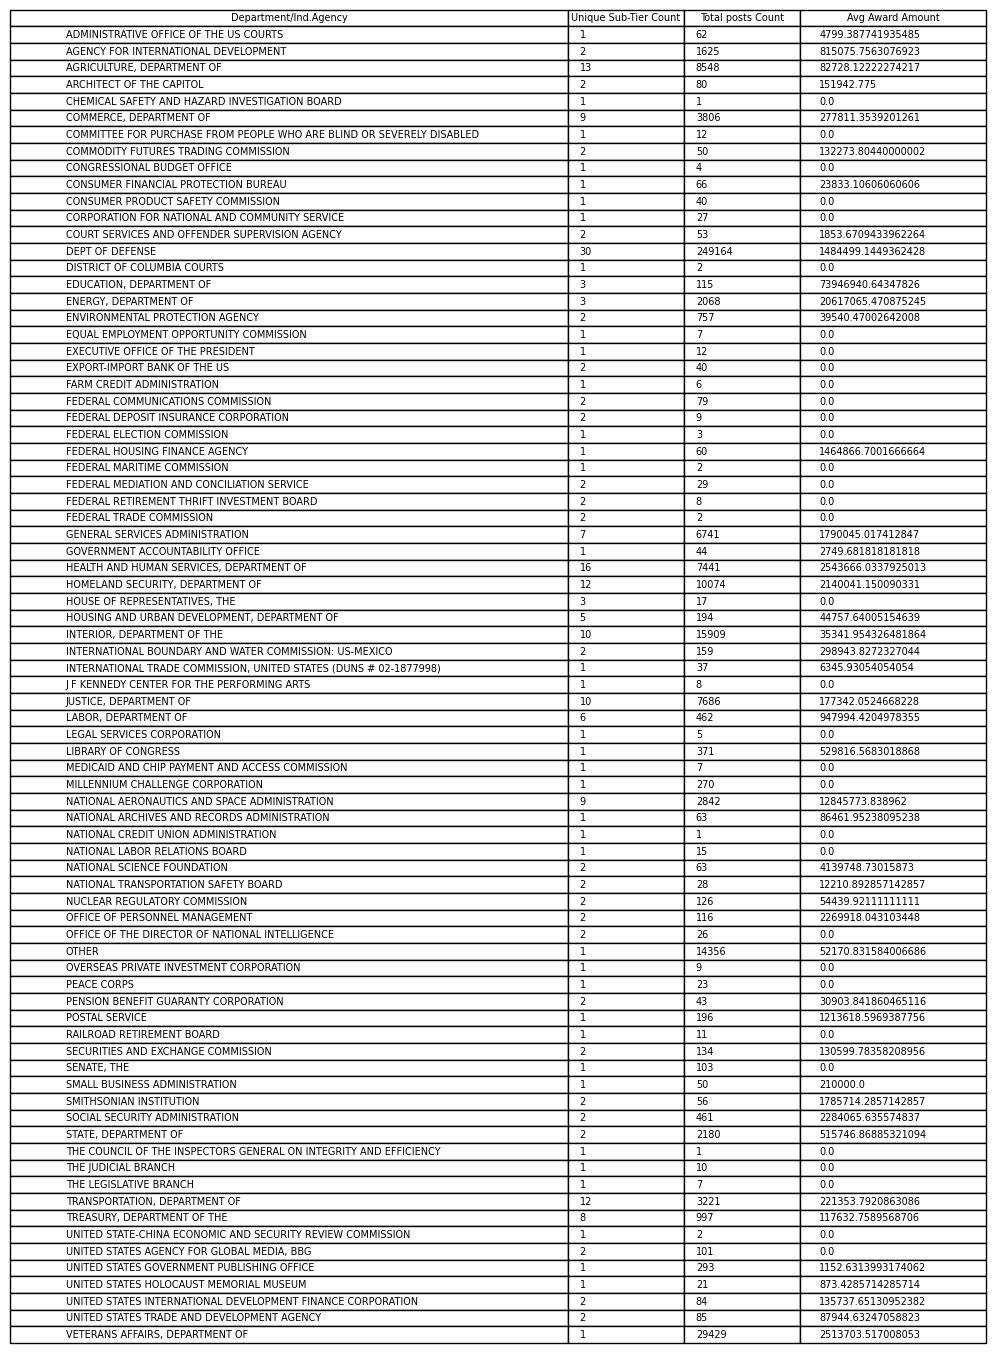

CPU times: total: 1.5 s
Wall time: 2.94 s


In [19]:
%%time
# Create a figure and axis for the table
fig, ax = plt.subplots(figsize=(12, 6))

# Remove axis
ax.axis('off')

# Create the table chart
table = ax.table(cellText=pivot_table.values, colLabels=pivot_table.columns, loc='center', cellLoc='left',colWidths=[0.6,0.125,0.125,0.2])

# Set the table properties
table.auto_set_font_size(False)
table.set_fontsize(7)
table.scale(1, 1)  # Adjust the scaling of the table

# Show the table chart
plt.show()

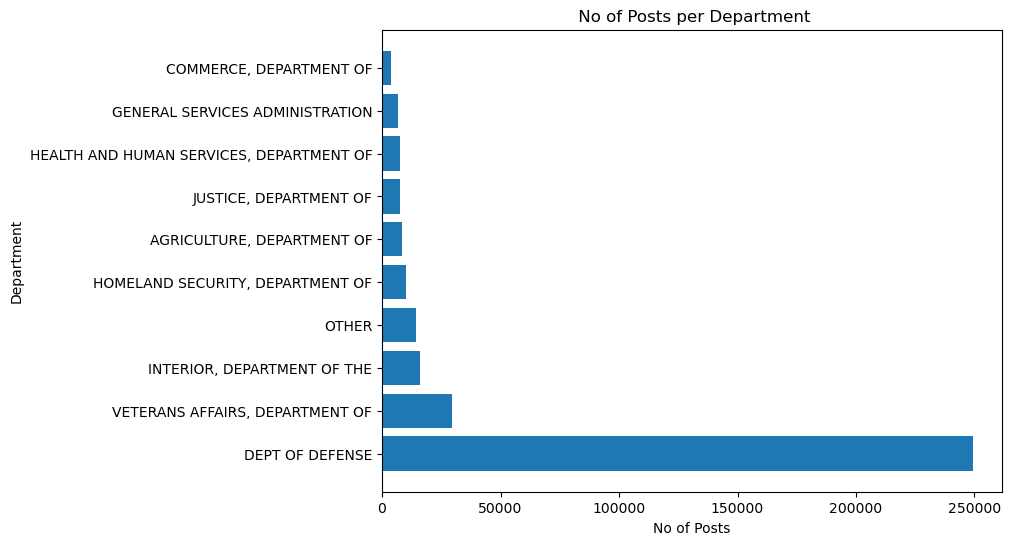

CPU times: total: 297 ms
Wall time: 439 ms


In [20]:
%%time
#grouping the values by Department/Ind.Agency and getting the top 10 based on count of posts
np_dep = new_df.groupby('Department/Ind.Agency')['Department/Ind.Agency'].count()

#sorting the values in descending order and getting top 10 departments
np_dep_Sorted=np_dep.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))

#plotting the horizontal bar Department Vs No. of posts
plt.barh(np_dep_Sorted.index, np_dep_Sorted.values)

#labelling the plot, x-axis and y-axis
plt.title(' No of Posts per Department')
plt.xlabel('No of Posts')
plt.ylabel('Department')

plt.show()

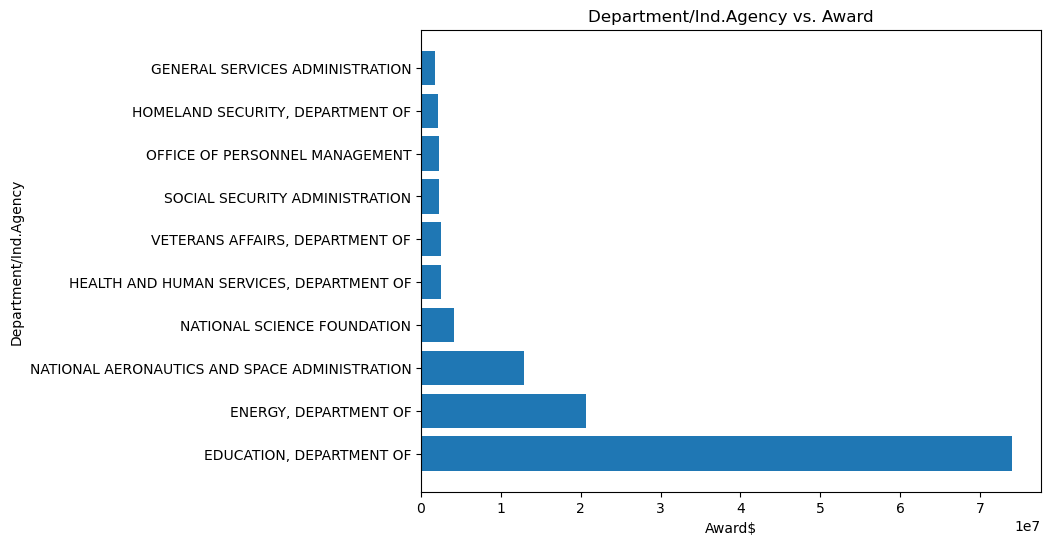

CPU times: total: 297 ms
Wall time: 438 ms


In [21]:
%%time
#grouping the values by Department/Ind.Agency and getting the top 10 based on average awarde amount
df = new_df[['Department/Ind.Agency', 'Award$']]

#finding mean of the awarde amount
grouped = df.groupby('Department/Ind.Agency').mean()

#sorting the values in ascending order
np_dep_Sorted=grouped.sort_values(by='Award$', ascending=False).head(10)


plt.figure(figsize=(8,6))
# Create a bar plot of Average speed vs. severity
plt.barh(np_dep_Sorted.index, np_dep_Sorted['Award$'])

#nameing the plot, x-axis and y-axis 
plt.xlabel('Award$')
plt.ylabel('Department/Ind.Agency')
plt.title('Department/Ind.Agency vs. Award')
plt.show()

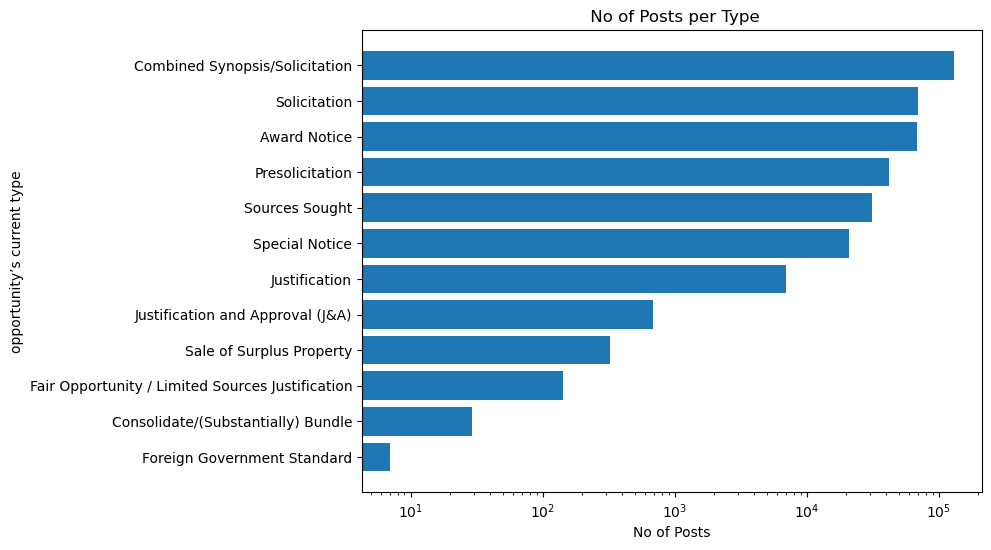

CPU times: total: 719 ms
Wall time: 1.1 s


In [22]:
%%time
#grouping the values based on Type
np_dep = new_df.groupby('Type')['Type'].count()

#sorting the values in ascending order
np_dep_Sorted=np_dep.sort_values()

plt.figure(figsize=(8,6))

#plotting the horizontal bar for Opportunity Current type and No. of posts
plt.barh(np_dep_Sorted.index, np_dep_Sorted.values, log=True)

#labelling the plot, x-axis and y-axis
plt.title(' No of Posts per Type')
plt.xlabel('No of Posts')
plt.ylabel('opportunity’s current type')

plt.show()

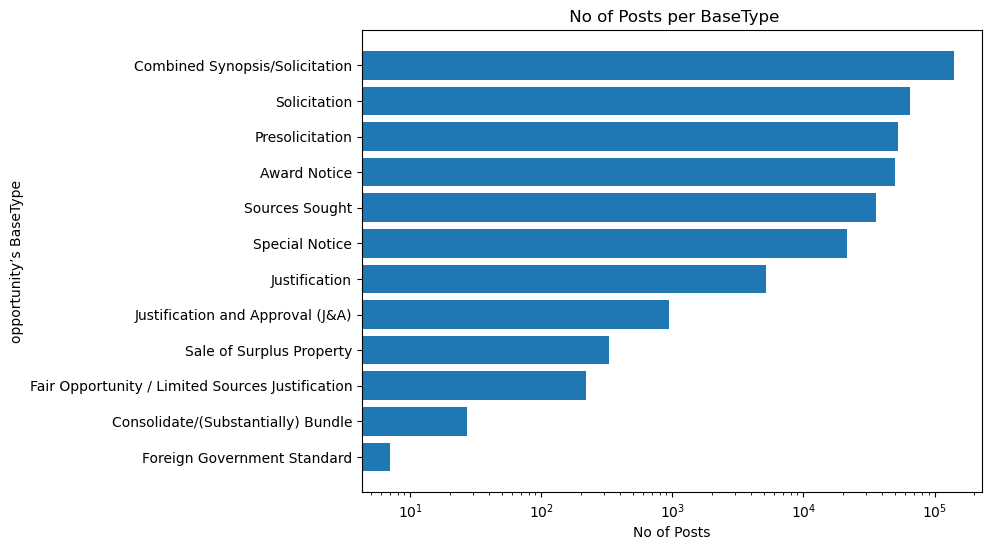

CPU times: total: 484 ms
Wall time: 894 ms


In [23]:
%%time
#grouping the values based on BaseType
np_dep = new_df.groupby('BaseType')['BaseType'].count()
#sorting the values in ascending order
np_dep_Sorted=np_dep.sort_values()

plt.figure(figsize=(8,6))

#plotting the horizontal bar for Opportunity BaseType and No. of posts
plt.barh(np_dep_Sorted.index, np_dep_Sorted.values, log=True)

#labelling the plot, x-axis and y-axis
plt.title(' No of Posts per BaseType')
plt.xlabel('No of Posts')
plt.ylabel('opportunity’s BaseType')

plt.show()

In [24]:
%%time
# Check if the values of 'Original type' and 'current type' of the opportunity’s are different and get the count
new_df['DifferentValues'] = new_df['Type'] != new_df['BaseType']

# Count the number of rows where the values are different
count_different = new_df['DifferentValues'].sum()

# Print the count
print(count_different)

39883
CPU times: total: 62.5 ms
Wall time: 78.1 ms


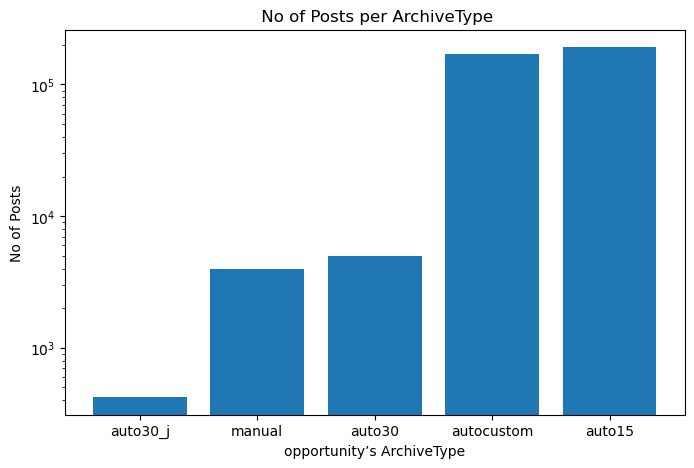

CPU times: total: 375 ms
Wall time: 610 ms


In [25]:
%%time
#grouping the values based on Archive Type
np_dep = new_df.groupby('ArchiveType')['ArchiveType'].count()
#sorting the values in ascending order
np_dep_Sorted=np_dep.sort_values()

plt.figure(figsize=(8,5))

#plotting the horizontal bar weather condition Vs count of Accidents
plt.bar(np_dep_Sorted.index, np_dep_Sorted.values, log=True)

#labelling the plot, x-axis and y-axis
plt.title(' No of Posts per ArchiveType')
plt.xlabel('opportunity’s ArchiveType')
plt.ylabel('No of Posts')

plt.show()

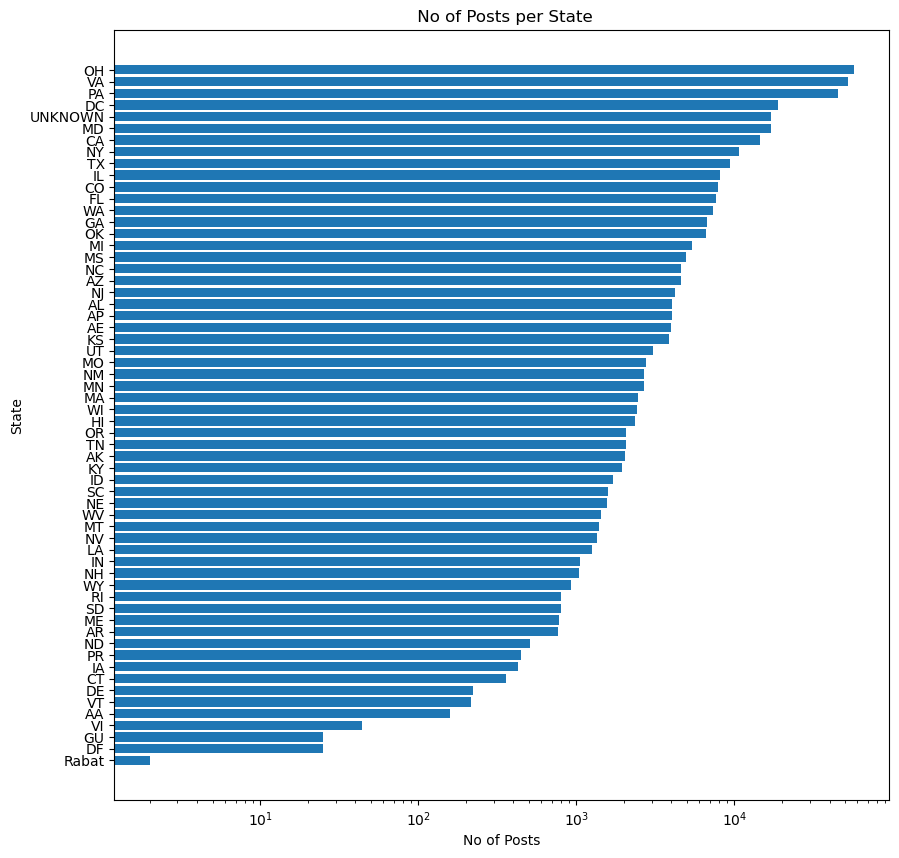

CPU times: total: 906 ms
Wall time: 1.25 s


In [26]:
%%time
#grouping the values based on State
np_dep = new_df.groupby('State')['State'].count()

#sorting the values in ascending order
np_dep_Sorted=np_dep.sort_values()

plt.figure(figsize=(10,10))

#plotting the horizontal bar State Vs No. of Posts
plt.barh(np_dep_Sorted.index, np_dep_Sorted.values, log=True)

#labelling the plot, x-axis and y-axis
plt.title(' No of Posts per State')
plt.xlabel('No of Posts')
plt.ylabel('State')

plt.show()

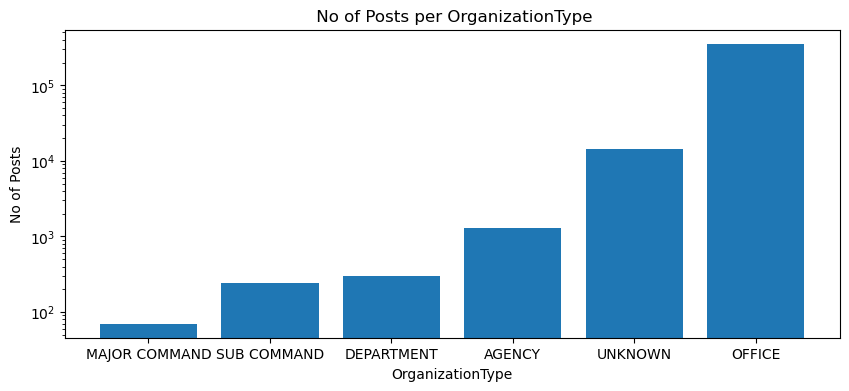

CPU times: total: 750 ms
Wall time: 784 ms


In [27]:
%%time
#grouping the values based on OrganizationType
np_dep = new_df.groupby('OrganizationType')['OrganizationType'].count()

#sorting the values in ascending order
np_dep_Sorted=np_dep.sort_values()

plt.figure(figsize=(10,4))

#plotting the horizontal bar Organization Type Vs No of posts
plt.bar(np_dep_Sorted.index, np_dep_Sorted.values, log=True)

#labelling the plot, x-axis and y-axis
plt.title(' No of Posts per OrganizationType')
plt.xlabel('OrganizationType')
plt.ylabel('No of Posts')

plt.show()

### Time Series Analysis

In [28]:
%%time
# Convert 'PostedDate' column to datetime type with utc=True
new_df['PostedDate'] = pd.to_datetime(new_df['PostedDate'], utc=True)

# Extract the month from 'PostedDate' column
new_df['Month'] = new_df['PostedDate'].dt.month_name()

#find difference between posted date and repsonse dead line
new_df['PostedDate'] = pd.to_datetime(new_df['PostedDate'], utc=True)
new_df['ArchiveDate'] = pd.to_datetime(new_df['ArchiveDate'], utc=True)

# Calculate the difference between the dates
new_df['DateDiff'] = (new_df['ArchiveDate'] - new_df['PostedDate']).min()

new_df.head()

CPU times: total: 4.09 s
Wall time: 4.69 s


,NoticeId,Title,Sol#,Department/Ind.Agency,CGAC,Sub-Tier,FPDS Code,Office,AAC Code,PostedDate,...,Award$,Awardee,OrganizationType,State,City,ZipCode,CountryCode,DifferentValues,Month,DateDiff
0,425a9edc53e84373aeb2826644ac97b6,66--Airfield Friction Tester,W50S9C-20-Q-0003,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,W7N4 USPFO ACTIVITY VT ARNG,W912LN,2020-10-01 03:57:23.594000+00:00,...,75706.10,"HALLIDAY TECHNOLOGIES INC [DUNS: 011448375],10...",OFFICE,VT,COLCHESTER,05446-3099,USA,True,October,-36124 days +03:28:03.452000
1,cbdb7b8ee8de4179b25c36e3b4819a2c,65--COVID 19 cleaning supplies,1018031080_01,"STATE, DEPARTMENT OF",19.0,"STATE, DEPARTMENT OF",1900,ACQUISITIONS - AQM MOMENTUM,19AQMM,2020-10-01 03:53:02.228000+00:00,...,11876.98,"KAN HERITAGE INC [DUNS: 079669146],7620 FOLSOM...",OFFICE,DC,WASHINGTON,20520,USA,True,October,-36124 days +03:28:03.452000
2,c8609373b0734f1aa5d9dcdf7e26f4c6,58--Voyager DSV,1019022491_01,"STATE, DEPARTMENT OF",19.0,"STATE, DEPARTMENT OF",1900,ACQUISITIONS - AQM MOMENTUM,19AQMM,2020-10-01 03:48:57.306000+00:00,...,110867.00,LIGHTFOOT COMMUNICATIONS LLC [DUNS: 943850268]...,OFFICE,DC,WASHINGTON,20520,USA,True,October,-36124 days +03:28:03.452000
3,c07957305b754b35957e539f98150dcf,Contract Opportunity Lease of Office Space wit...,20-REG11_8VA2699,GENERAL SERVICES ADMINISTRATION,47.0,PUBLIC BUILDINGS SERVICE,4740,PBS R11 LEASING DIV,47PM99,2020-10-01 03:45:27.966000+00:00,...,0.00,UNKNOWN,OFFICE,DC,WASHINGTON,20407,USA,False,October,-36124 days +03:28:03.452000
4,50463c77de6c4ebdbd7f1e8be833f4fb,6540-- VISN 5 Eyeglass Contract,36C24520R0012,"VETERANS AFFAIRS, DEPARTMENT OF",36.0,"VETERANS AFFAIRS, DEPARTMENT OF",3600,245-NETWORK CONTRACT OFFICE 5 (36C245),36C245,2020-10-01 03:43:15.213000+00:00,...,0.00,null,OFFICE,MD,LINTHICUM,21090,USA,False,October,-36124 days +03:28:03.452000


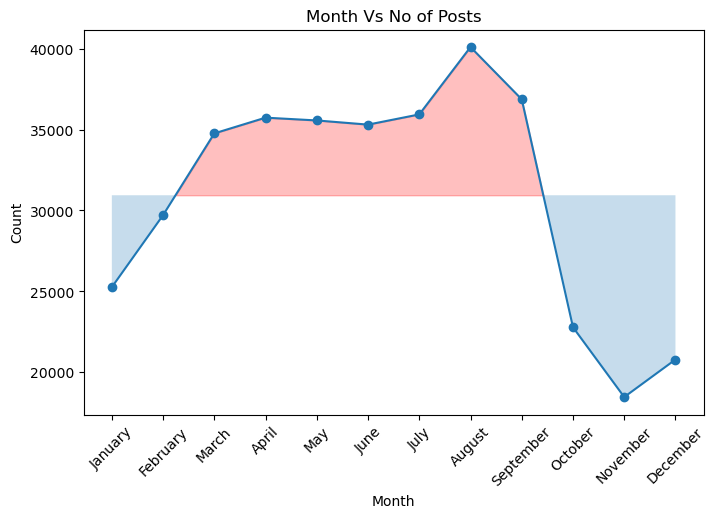

CPU times: total: 234 ms
Wall time: 362 ms


In [29]:
%%time

#grouping the values based on Month to find in which Month most number of posts are anounced
ac_Hour = new_df.groupby('Month')['Month'].count()

#sorting values based on the month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
grouped_df = ac_Hour.reindex(month_order, axis=0)

#finding average count of accidents
average = grouped_df.values.mean()


plt.figure(figsize=(8,5))

#plotting Hour Vs Number of Accidnets
plt.plot(grouped_df.index, grouped_df.values, marker='o')

#filling the space between average and value to show the place where most number of accidents happened
plt.fill_between(grouped_df.index, grouped_df.values, average,
                where=(grouped_df.values > average),
                interpolate=True, alpha=0.25, color= 'Red')

plt.fill_between(grouped_df.index, grouped_df.values, average,
                where=(grouped_df.values <= average),
                interpolate=True, alpha=0.25)

#nameing the plot, x-axis and y-axis 
plt.title('Month Vs No of Posts')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Count')


plt.show()

## Hypothesis

In [30]:
%%time
# Create separate data series for 3 Opportunity Type
Type_1 = new_df[new_df['Type'] == 'Solicitation']['Award$']
Type_2 = new_df[new_df['Type'] == 'Presolicitation']['Award$']
Type_3 = new_df[new_df['Type'] == 'Award Notice']['Award$']

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(Type_1, Type_2, Type_3)

# Print the results
print("One-way ANOVA:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

One-way ANOVA:
F-statistic: 52.16399110846232
p-value: 2.2490651375524355e-23
Reject the null hypothesis
CPU times: total: 531 ms
Wall time: 611 ms


In [31]:
%%time
# Create separate data series for each Department classification
Department_1 = new_df[new_df['Department/Ind.Agency'] == 'EDUCATION, DEPARTMENT OF']['Award$']
Department_2 = new_df[new_df['Department/Ind.Agency'] == 'ENERGY, DEPARTMENT OF']['Award$']


# Perform t-test for independent samples between Department 1 and Department 2
t_statistic, p_value_t = stats.ttest_ind(Department_1, Department_2)

# Print the results
print("T-test between Department 1 and Department 2:")
print("t-statistic:", t_statistic)
print("p-value:", p_value_t)

if p_value < 0.05:
    print('Reject null hypothesis, Since there is significant difference between the awarde amount for both department.')
else:
    print('Fail to reject the null hypothesis, Since there is no significant difference between the awarde amount for both department.')


T-test between Department 1 and Department 2:
t-statistic: 1.789108768898956
p-value: 0.07373602396913559
Reject null hypothesis, Since there is significant difference between the awarde amount for both department.
CPU times: total: 93.8 ms
Wall time: 113 ms


In [32]:
%%time
# Create a contingency table of department counts
contingency_table = pd.crosstab(new_df['Department/Ind.Agency'], columns='Count')

# Extract the counts for the two departments of interest
dept1_count = contingency_table.loc['DEPT OF DEFENSE', 'Count']
dept2_count = contingency_table.loc['VETERANS AFFAIRS, DEPARTMENT OF', 'Count']

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency([[dept1_count, dept2_count]])

# Print the results
print("Chi-square test:")
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Chi-square test:
Chi-square statistic: 0.0
p-value: 1.0
Fail to reject the null hypothesis
CPU times: total: 93.8 ms
Wall time: 157 ms


In [33]:
%%time
month1 = new_df[new_df['Month'] == 'January']['Award$']
month2 = new_df[new_df['Month'] == 'February']['Award$']
month3 = new_df[new_df['Month'] == 'March']['Award$']
month4 = new_df[new_df['Month'] == 'April']['Award$']
month5 = new_df[new_df['Month'] == 'May']['Award$']
month6 = new_df[new_df['Month'] == 'June']['Award$']
month7 = new_df[new_df['Month'] == 'July']['Award$']
month8 = new_df[new_df['Month'] == 'August']['Award$']
month9 = new_df[new_df['Month'] == 'September']['Award$']
month10 = new_df[new_df['Month'] == 'October']['Award$']
month11 = new_df[new_df['Month'] == 'November']['Award$']
month12 = new_df[new_df['Month'] == 'December']['Award$']


# Perform one-way ANOVA
f_statistic, p_value = f_oneway(month1, month2, month3, month4, month5, month6, month7, month8, month9, month10, month11, month12)


# Print the results
print("One-way ANOVA:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


One-way ANOVA:
F-statistic: 4.42462125938486
p-value: 1.0847069575353753e-06
Reject the null hypothesis
CPU times: total: 547 ms
Wall time: 816 ms


In [34]:
%%time
# Extract the relevant columns
contract_duration = new_df['DateDiff']
award_amount = new_df['Award$']

# Perform Pearson correlation coefficient test
correlation_coefficient, p_value = pearsonr(contract_duration, award_amount)

# Print the results
print("Pearson correlation coefficient test:")
print("Correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    
    print("Fail to reject the null hypothesis")


Pearson correlation coefficient test:
Correlation coefficient: nan
p-value: nan
Fail to reject the null hypothesis
CPU times: total: 31.2 ms
Wall time: 19.6 ms


C:\Users\poorn\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


#### Findings And Summary
    

* Department of Defense has the most number of sub tiers and most number of contract opportunities anounced in the year 2020.
* Department of Education has the highest awarde amount.
* Ohio and Virginia had the highest number of contract opportunities.
* Most number of anouncements came in mid  year. April to September has the highest number of opportunities anounced.
* Under the Organization type, OFFICE had the highest number of posts recorded.
* Under the Archive type more number of posts were recorded under the AutoCustom and Auto15 Archive type.
